# Yellow Cab Case

## Instructions
We created this template to help you complete the _Yellow Cab_ case. Use this template to complete the Python portion of the case. In the template, the heading numbers correspond to the heading numbers in the case document.

## 2. Load Relevant Packages and Dependencies

There's a new document titled _Installing and Updating Packages for Yellow Cab Case.pdf_. You need to follow the steps in that document, but you only need to do that stuff once.  
1. Get that document. 
2. Close Jupyter and/or JupyterLab.
3. Reboot your computer.
4. Follow the instructions in that document.

### 2.1. Imports
Make sure you have updated and installed the packages above before running the following cells.

In [1]:
import pandas as pd 
import numpy as np 

# Import matplotlib and make sure it outputs plots to your notebook
%matplotlib inline 
import matplotlib.pyplot as plt

# Import seaborn and set the style
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')

# The bokeh and set it up to output plots to your notebook
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

# Get some other useful bokeh features
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool

Loading BokehJS ...

## 3. Load and Look at the Data

Load the data in the following cell:

In [2]:
df = pd.read_csv("Yellow Cab_Data.csv")
df.sample(10)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,pickup_community_area,taxi_id,tips,tolls,trip_end_timestamp,trip_id,trip_miles,trip_seconds,trip_start_timestamp,trip_total
1255227,NaN,NaN,41.922686,"{'type': 'Point', 'coordinates': [-87.64948872...",-87.649489,7.0,1.0,12.25,Cash,NaN,...,8.0,d5aba5063677865e59e8065941035b88b25e58fc949fc5...,0.00,0.0,2015-12-23T22:15:00.000,12d36b3be9d6e61c22c8341bb81f1d8516d2611e,4.4,660.0,2015-12-23T22:00:00.000,13.25
361512,NaN,1.703108e+10,41.892042,"{'type': 'Point', 'coordinates': [-87.63186394...",-87.631864,8.0,1.0,4.45,Credit Card,1.703108e+10,...,8.0,f0b96329a7e3906bb2e11b8af456f130f0ae9b2b57643e...,2.00,0.0,2015-06-24T20:00:00.000,10677afb11db1800ba38cf2bbe3e9668989e405e,0.4,240.0,2015-06-24T20:00:00.000,7.45
1178428,NaN,1.703108e+10,41.891972,"{'type': 'Point', 'coordinates': [-87.61294541...",-87.612945,8.0,1.0,10.05,Cash,1.703184e+10,...,32.0,e8b30fe3cdcf458994b6943ba607e06f31b92202cab6b7...,0.00,0.0,2013-07-13T13:15:00.000,129e43c65ba9465eb16faa1b43b590ed39fc4b70,2.0,960.0,2013-07-13T13:00:00.000,11.05
859197,Choice Taxi Association,1.703108e+10,41.892042,"{'type': 'Point', 'coordinates': [-87.63186394...",-87.631864,8.0,0.0,5.05,Cash,1.703184e+10,...,32.0,c92ffc47a21e745772199e454f7749ca499407d0079a94...,0.00,0.0,2014-06-11T22:15:00.000,11c0bd6ad652652e2f0e388c51a64b1726c587f4,0.8,240.0,2014-06-11T22:15:00.000,5.05
449996,Taxi Affiliation Services,1.703184e+10,41.880994,"{'type': 'Point', 'coordinates': [-87.63274648...",-87.632746,32.0,0.0,6.85,Cash,1.703184e+10,...,32.0,a4e38923fa3ca8f2e4b1f0497275f97a199cd4f35a2dea...,0.00,0.0,2014-03-10T19:00:00.000,10a4d7ac3537369bb27d5ea40c93d1d78b6fe307,0.0,600.0,2014-03-10T19:00:00.000,6.85
1271946,Taxi Affiliation Services,NaN,41.901207,"{'type': 'Point', 'coordinates': [-87.67635598...",-87.676356,24.0,0.0,9.65,Cash,NaN,...,8.0,300d94fbea035e07d9e812a32051950a7ad66f7de3a3af...,0.00,0.0,2015-10-26T14:15:00.000,12dee6bbfff499866a17d2ae2b64db65b4101223,2.8,720.0,2015-10-26T14:00:00.000,9.65
613307,Taxi Affiliation Services,NaN,41.944227,"{'type': 'Point', 'coordinates': [-87.65599818...",-87.655998,6.0,0.0,15.00,Credit Card,NaN,...,32.0,3cd113f8fbc0bde853a72d5f5b6d84ff2da07e7236de34...,3.00,0.0,2016-09-27T17:15:00.000,11162466cdfc32ff538b6d7466b210d3117a1a44,0.2,1200.0,2016-09-27T17:00:00.000,18.00
471430,Northwest Management LLC,NaN,41.965812,"{'type': 'Point', 'coordinates': [-87.65587878...",-87.655879,3.0,1.0,15.45,Cash,NaN,...,32.0,398a697d813055db99bc6a4422617b857b8f8b53ac4e4d...,0.00,0.0,2015-11-18T21:30:00.000,10b3d283ae36ba2c2eda0f1c0631347f74c3fcd8,6.7,660.0,2015-11-18T21:30:00.000,16.45
1853289,NaN,1.703198e+10,41.979071,"{'type': 'Point', 'coordinates': [-87.90303966...",-87.903040,76.0,2.0,36.85,Credit Card,1.703108e+10,...,8.0,a62a0acd486be18bea787321d0084520c39fabb60a3cf8...,7.77,0.0,2015-11-23T06:00:00.000,14711f9ac01cc8c75f3670c4f9d6bb71a4e9857b,18.0,1560.0,2015-11-23T05:30:00.000,46.62
1875983,Taxi Affiliation Services,1.703177e+10,41.982775,"{'type': 'Point', 'coordinates': [-87.87730539...",-87.877305,NaN,3.5,9.05,Credit Card,1.703198e+10,...,76.0,32693393c16a975b5a11cddc63ad4e963b8b3282ba08b2...,2.50,0.0,2014-02-03T14:45:00.000,1480c626b7bde1e8d33e157469835d014f8f6fb2,0.0,480.0,2014-02-03T14:45:00.000,15.05


#### 3(a): In your Jupyter Notebook list the number of rows and columns

In [3]:
count_row = df.shape[0] 
count_col = df.shape[1] 
print('The number of rows:',count_row)
print('The number of colunms:',count_col)

The number of rows: 2000000
The number of colunms: 23


#### 3(b): In your Jupyter Notebook use a Markdown cell to discuss whether any of the DataFrame columns have null values? Which ones? For each column, compute the fraction of values that are null.

In [4]:
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

company                       701866
dropoff_census_tract          571717
dropoff_centroid_latitude      57552
dropoff_centroid_location      57552
dropoff_centroid_longitude     57552
dropoff_community_area         61301
extras                            17
fare                              17
pickup_census_tract           555357
pickup_centroid_latitude       13816
pickup_centroid_location       13816
pickup_centroid_longitude      13816
pickup_community_area          13859
taxi_id                          123
tips                              17
tolls                             17
trip_end_timestamp               288
trip_miles                        10
trip_seconds                     436
trip_total                        17
dtype: int64


#### 3(c): What columns seem the most interesting for analysis and what are you going to have to do to clean them?

I want to analyze the column "extras", "fare", "tolls", "tips", "trip_total", because these columns are highly relative with the total revenue. I also want to analyze the column "pickup_community_area", I want to find that which area has the highest opportunity to get an order.   
I need to drop NA for these columns.

#### 3(d): The column `trip_total` is the total amount paid by the customer to the taxi driver. What’s your best guess as to how they actually computed `trip_total` using the other columns in the table? Do a calculation to make sure this is what they did. Is your calculation based upon the other columns in the DataFrame close to `trip_total`?

trip_total = fare + extra + tolls + tips  
From [City of Chicago](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew) 

In [5]:
df1 = df.loc[:,'company':'trip_total']
df1['extras'] = df1['extras'].replace(np.nan, 0)
df1['fare'] = df1['fare'].replace(np.nan, 0)
df1['tips'] = df1['tips'].replace(np.nan, 0)
df1['tolls'] = df1['tolls'].replace(np.nan, 0)
df1['trip_total'] = df1['trip_total'].replace(np.nan, 0)
df1['total_trip']=df1['extras']+df1['fare']+df1['tips']+df1['tolls']
lst = list(df1['total_trip'] == df1['trip_total'])
print('The number of True:',lst.count(True))
print('The number of False:',lst.count(False))

The number of True: 1912399
The number of False: 87601


Because the original data is not clean, there are same difference.

## 4. Clean the Data

### 4.1 Eliminate Bad Data

#### 4.1(a): Delete trips with NaN mileage and NaN seconds and provide a very brief description for why we deleted them. Why didn’t we delete trips with 0 seconds and 0 miles?

In [6]:
df=df.dropna(axis=0, subset=['trip_miles','trip_seconds'])

Because the NaN value has nothing to do with our analysis, so we need to drop them. But we need to keep the 0 seconds and 0 miles, because trips may still be incurred when mileage is zero and second is zero. For example, the driver and the passenger can negotiate a price without recording mileage and time.

#### 4.1(b): Delete trips with NaN for cost and with \$0 cost and provide a very brief description for why we deleted them.

In [7]:
df=df.dropna(axis=0, subset=['trip_total'])
df =df.loc[df.trip_total!=0]

Because we want analyze the revenue, the trip with NaN value and 0 value has nothing to do with our analysis.

### 4.2 Make Datetime objects

#### 4.2(a): Convert the columns `trip_start_timestamp` and `trip_end_timestamp` to Pandas datetime objects and store them in new columns named `trip_start` and `trip_end`, respectively. 

In [8]:
df['trip_start'] = pd.to_datetime(df['trip_start_timestamp'])
df['trip_end'] = pd.to_datetime(df['trip_end_timestamp'])
df.head(10)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,tips,tolls,trip_end_timestamp,trip_id,trip_miles,trip_seconds,trip_start_timestamp,trip_total,trip_start,trip_end
0,NaN,1.703198e+10,41.979071,"{'type': 'Point', 'coordinates': [-87.90303966...",-87.903040,76.0,0.0,29.00,Credit Card,1.703198e+10,...,4.35,0.0,2014-06-24T08:15:00.000,0f6d97fa5263afe0c7a4ea81af91d3bdba8cca39,0.00,0.0,2014-06-24T08:15:00.000,33.35,2014-06-24 08:15:00,2014-06-24 08:15:00
1,Taxi Affiliation Services,1.703132e+10,41.884987,"{'type': 'Point', 'coordinates': [-87.62099291...",-87.620993,32.0,1.0,5.85,Cash,1.703184e+10,...,0.00,0.0,2013-10-09T22:30:00.000,0f6d9803ed1092b9502fbc27b6bf4416d51d1584,1.20,300.0,2013-10-09T22:30:00.000,6.85,2013-10-09 22:30:00,2013-10-09 22:30:00
2,NaN,NaN,41.922761,"{'type': 'Point', 'coordinates': [-87.69915534...",-87.699155,22.0,0.0,7.25,Credit Card,NaN,...,2.00,0.0,2013-05-18T22:45:00.000,0f6d9863f51d9bcfbde34650d5bf03da707b8c30,2.20,360.0,2013-05-18T22:30:00.000,9.25,2013-05-18 22:30:00,2013-05-18 22:45:00
3,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.45,Cash,1.703128e+10,...,0.00,0.0,2015-09-14T10:30:00.000,0f6d98a5e3058b341c580d52f10e8b67e8a2886b,1.40,780.0,2015-09-14T10:15:00.000,8.45,2015-09-14 10:15:00,2015-09-14 10:30:00
4,Taxi Affiliation Services,1.703124e+10,41.900560,"{'type': 'Point', 'coordinates': [-87.69419737...",-87.694197,24.0,0.0,7.25,Cash,1.703124e+10,...,0.00,0.0,2015-10-24T11:30:00.000,0f6d98a6a24a38b4dcf0d476836459e298969ac6,2.20,420.0,2015-10-24T11:30:00.000,7.25,2015-10-24 11:30:00,2015-10-24 11:30:00
5,NaN,1.703108e+10,41.892042,"{'type': 'Point', 'coordinates': [-87.63186394...",-87.631864,8.0,1.5,9.50,Cash,1.703108e+10,...,0.00,0.0,2017-03-12T01:30:00.000,0f6d990b322b407441e5ff63b63d583da05138d7,2.50,540.0,2017-03-12T01:30:00.000,11.00,2017-03-12 01:30:00,2017-03-12 01:30:00
6,Blue Ribbon Taxi Association Inc.,1.703108e+10,41.890922,"{'type': 'Point', 'coordinates': [-87.61886835...",-87.618868,8.0,3.0,35.85,Credit Card,NaN,...,0.00,0.0,2013-07-18T12:00:00.000,0f6d9928e3f35b63bd334729b8cdc4e48dde3577,1.00,2220.0,2013-07-18T11:15:00.000,38.85,2013-07-18 11:15:00,2013-07-18 12:00:00
7,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.65,Credit Card,1.703132e+10,...,0.00,0.0,2013-01-23T15:45:00.000,0f6d99729a2f1b68fcbb1e8fcc4c91e3a435d5b1,0.00,660.0,2013-01-23T15:30:00.000,8.65,2013-01-23 15:30:00,2013-01-23 15:45:00
8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.05,Cash,1.703108e+10,...,0.00,0.0,2013-08-17T18:45:00.000,0f6d99a548905cba9f35ee6620c91b2d0738faf4,3.44,780.0,2013-08-17T18:30:00.000,11.05,2013-08-17 18:30:00,2013-08-17 18:45:00
9,Choice Taxi Association,1.703184e+10,41.880994,"{'type': 'Point', 'coordinates': [-87.63274648...",-87.632746,32.0,0.0,8.05,Cash,1.703108e+10,...,0.00,0.0,2013-05-17T15:45:00.000,0f6d99cff442ad02a05db9f8e4b819ebc63fda2f,1.90,600.0,2013-05-17T15:45:00.000,8.05,2013-05-17 15:45:00,2013-05-17 15:45:00


#### 4.2(b): Create five new columns for the year, month, day, hour, and day of the week respectively (use the start of the trip, since that is something the taxi driver can control).

In [9]:
df['Year'] = df['trip_start'].dt.year
df['month'] = df['trip_start'].dt.month
df['day'] = df['trip_start'].dt.day
df['hour'] = df['trip_start'].dt.hour
df['day of the week'] = df['trip_start'].dt.strftime('%A')
df.head(10)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,trip_seconds,trip_start_timestamp,trip_total,trip_start,trip_end,Year,month,day,hour,day of the week
0,NaN,1.703198e+10,41.979071,"{'type': 'Point', 'coordinates': [-87.90303966...",-87.903040,76.0,0.0,29.00,Credit Card,1.703198e+10,...,0.0,2014-06-24T08:15:00.000,33.35,2014-06-24 08:15:00,2014-06-24 08:15:00,2014,6,24,8,Tuesday
1,Taxi Affiliation Services,1.703132e+10,41.884987,"{'type': 'Point', 'coordinates': [-87.62099291...",-87.620993,32.0,1.0,5.85,Cash,1.703184e+10,...,300.0,2013-10-09T22:30:00.000,6.85,2013-10-09 22:30:00,2013-10-09 22:30:00,2013,10,9,22,Wednesday
2,NaN,NaN,41.922761,"{'type': 'Point', 'coordinates': [-87.69915534...",-87.699155,22.0,0.0,7.25,Credit Card,NaN,...,360.0,2013-05-18T22:30:00.000,9.25,2013-05-18 22:30:00,2013-05-18 22:45:00,2013,5,18,22,Saturday
3,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.45,Cash,1.703128e+10,...,780.0,2015-09-14T10:15:00.000,8.45,2015-09-14 10:15:00,2015-09-14 10:30:00,2015,9,14,10,Monday
4,Taxi Affiliation Services,1.703124e+10,41.900560,"{'type': 'Point', 'coordinates': [-87.69419737...",-87.694197,24.0,0.0,7.25,Cash,1.703124e+10,...,420.0,2015-10-24T11:30:00.000,7.25,2015-10-24 11:30:00,2015-10-24 11:30:00,2015,10,24,11,Saturday
5,NaN,1.703108e+10,41.892042,"{'type': 'Point', 'coordinates': [-87.63186394...",-87.631864,8.0,1.5,9.50,Cash,1.703108e+10,...,540.0,2017-03-12T01:30:00.000,11.00,2017-03-12 01:30:00,2017-03-12 01:30:00,2017,3,12,1,Sunday
6,Blue Ribbon Taxi Association Inc.,1.703108e+10,41.890922,"{'type': 'Point', 'coordinates': [-87.61886835...",-87.618868,8.0,3.0,35.85,Credit Card,NaN,...,2220.0,2013-07-18T11:15:00.000,38.85,2013-07-18 11:15:00,2013-07-18 12:00:00,2013,7,18,11,Thursday
7,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.65,Credit Card,1.703132e+10,...,660.0,2013-01-23T15:30:00.000,8.65,2013-01-23 15:30:00,2013-01-23 15:45:00,2013,1,23,15,Wednesday
8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.05,Cash,1.703108e+10,...,780.0,2013-08-17T18:30:00.000,11.05,2013-08-17 18:30:00,2013-08-17 18:45:00,2013,8,17,18,Saturday
9,Choice Taxi Association,1.703184e+10,41.880994,"{'type': 'Point', 'coordinates': [-87.63274648...",-87.632746,32.0,0.0,8.05,Cash,1.703108e+10,...,600.0,2013-05-17T15:45:00.000,8.05,2013-05-17 15:45:00,2013-05-17 15:45:00,2013,5,17,15,Friday


#### 4.2(c): List the number of columns and rows of the DataFrame.

In [10]:
count_row = df.shape[0] 
count_col = df.shape[1] 
print('The number of rows:',count_row)
print('The number of columns:',count_col)

The number of rows: 1997211
The number of columns: 30


### 4.3 Get Rid of Outliers

Run the following cell, which defines a function called `CreateHistogram`. This function will produce an interactive plot.

In [11]:
# The first argument should be a Pandas DataFrame.
# The second argument should be a string that contains the name of a column in the dataframe.
def CreateHistogram(dataframe, col_name):
    num_bins=50

    hist, edges = np.histogram(dataframe[col_name], bins=num_bins)

    data = {'top': hist, 
            'bottom': np.zeros(len(hist)), 
            'left': edges[:-1], 
            'right': edges[1:]}
    source = ColumnDataSource(data)

    p = figure(tools='pan,box_zoom,wheel_zoom,undo,reset,save', 
               background_fill_color="#fafafa",
               plot_height=400, plot_width=400)
    p.quad(top="top", bottom="bottom", left="left", right="right", 
           source=source,
           fill_color="navy", line_color="white", alpha=0.5,
           hover_fill_color='firebrick', hover_alpha=1.0,
           hover_line_color='white')

    # Create a HoverTool and add it to the figure
    hover = HoverTool(tooltips=[('Left edge','@left{0,0.00}'), 
                                ('Right edge','@right{0,0.00}'), 
                                ('Height','@top{0,0}')],
                      mode='mouse')
    p.add_tools(hover)

    p.y_range.start = 0
    p.xaxis.axis_label = col_name
    p.yaxis.axis_label = 'Count'
    p.grid.grid_line_color="white"

    show(p)

#### 4.3a Create a histogram of the column `trip_total` using the function `CreateHistogram` defined above.

In [12]:
CreateHistogram(df, 'trip_total')

#### 4.3b Interact with the plot you created in 4.3a. What are the values of the left edge, right edge, and height of the highest bar? What do these mean?

The value of the left edge is 0.01, the value of the right edge is 197.88, the value of the height is 1996743.  
This means there are 1996743 data distributed in the range of 0.01-197.88 total trip.

#### 4.3c Interact with the plot you created in 4.3a. What are the values of the left edge, right edge, and height of the _second_ highest bar? You will need to zoom in to see this bar.

The value of the left edge is 197.88, the value of the right edge is 395.74, the value of the height is 116.

#### 4.3d Interpret the histogram you created in 4.3a. What, if anything, do you learn from it?

The vast majority of the data distributed in the range of 0.01-197.88 total trip. The visual effect of this hitogram is not good, because it has too many outliers.

#### 4.3e Recreate the histogram from 4.3a, but this time, only plot values of `trip_total` less than \$200.00, which the approximate value of the right edge of the first bin. Describe this histogram. What do you learn from it?

In [13]:
CreateHistogram(df.loc[df.trip_total<200], 'trip_total')

There are 695264 data distributed in the range of 4.01-8.01 total trip, and 576523 data distributed in the range of 8.01-12.01. The majority of total tirps are in the range of 0.01-59.99. 

#### 4.3f Recreate the histogram from 4.3a, but this time, only plot values of `trip_total` less than \$75.00, which the approximate value of the right edge of the first bin. Describe this histogram. What do you learn from it?

In [14]:
CreateHistogram(df.loc[df.trip_total<75], 'trip_total')

This histogram is cleaner and easier to identify. The most total trip distributed between 6.01-7.5, followed by 7.5-9.0. The majority of total tirps are in the range of 3.01-22.49.

#### 4.3g Compute the mean and median value of `trip_total` for trips under \$75.

In [15]:
df2=df.loc[df.trip_total<75]
mean= np.mean(df2['trip_total'])
median=np.median(df2['trip_total'])
print('mean:',mean)
print('median:',median)

mean: 13.722418970143421
median: 9.25


#### 4.3h Decide which values of trip_total you want to keep in this analysis, and which you want to exclude as outliers. Specify a range of values (i.e. a minimum and a maximum) that you want to use. Justify your choice. There is no correct answer.

I want to keep the values of trip_total bewteen 3-60. Because there is very little data outside this interval.

#### 4.3i Using the function `CreateHistogram`, create a histogram of the column `trip_seconds`. This histogram you create will look like the one you created in 4.3a and will be hard to interpret. Narrow the range of values and create another histogram. Continue to create new histograms until you have a meaningful one. Keep this most meaningful one.

In [16]:
data=CreateHistogram(df.loc[df.trip_seconds<10000], 'trip_seconds')

#### 4.3j Interpret your final histogram for `trip_seconds`. Then state which range of this variable you want to keep in this analysis, and which you want to exclude as outliers. Specify a range of values (i.e. a minimum and a maximum). Justify your choice. There is no correct answer.

The most trip seconds distributed between 398.4-597.6, followed by 199.2-398.4. The majority of trip seconds are in the range of 0-2589.6. I want to keep the values of trip seconds bewteen 0-3200. Because there is very little data outside this interval. 

#### 4.3k What are the mean and median values of `trip_seconds` for trips less than one hour?

In [17]:
df3=df.loc[df.trip_seconds<3600]
mean= np.mean(df3['trip_seconds'])
median=np.median(df3['trip_seconds'])
print('mean:',mean)
print('median:',median)

mean: 733.7387462808426
median: 540.0


#### 4.3l Using the sample code provided here, create a hexagonal binned heat map. Plot `trip_seconds` on the x-axis and `trip_total` on the y-axis. Before plotting, filter your data so that you only include trips of less than an hour, and trips with the total fare between `$3` and `$75`.

In [18]:
df6=df.loc[df.trip_seconds < 3600].loc[df.trip_total <= 75].loc[df.trip_total >= 3]

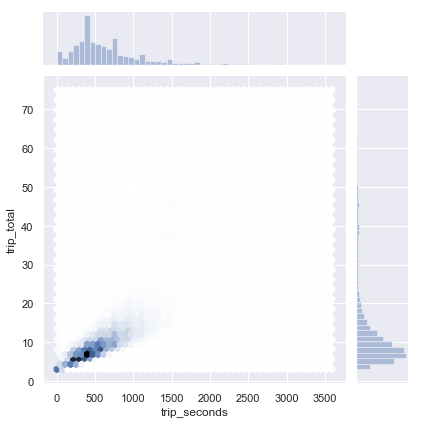

In [19]:
g = sns.jointplot(x='trip_seconds', y='trip_total', data=df6, kind='hex')
plt.show()

#### 4.3m Filter the data further and create another heat map.

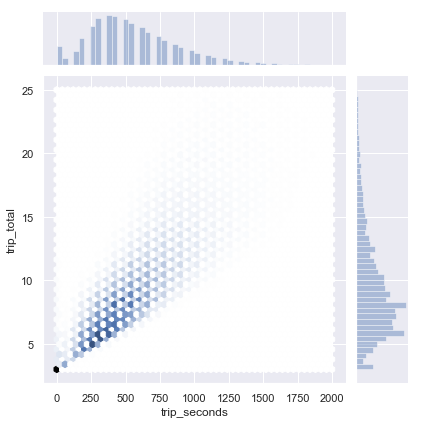

In [20]:
g = sns.jointplot(x='trip_seconds', y='trip_total', data=df.loc[df.trip_seconds < 2000].loc[df.trip_total <= 25].loc[df.trip_total >= 3], kind='hex')
plt.show()

#### 4.3n Interpret these heat maps. What do we learn about the relationship between `trip_total` and `trip_seconds`?

We can see from the heat map that the trip_total positively correlated with trip_seconds.

#### 4.3o In order to ensure that everybody produces identical graphs, we’re all going to use the same filters for the remainder of the case. The following filters might be different than the ones you chose above, and that’s okay. 
#### Eliminate all rows in which `trip_total` is outside the range $[3.00, 75.00]$. Also eliminate all rows in which `trip_seconds` is outside the range $[58, 3600]$. How many rows and columns does your DataFrame have now?

In [21]:
df5=df.loc[df.trip_seconds <=3600].loc[df.trip_seconds>=58].loc[df.trip_total <= 75].loc[df.trip_total >= 3]
count_row = df5.shape[0] 
count_col = df5.shape[1] 
print('The number of the row:',count_row)
print('The number of the column:',count_col)

The number of the row: 1914376
The number of the column: 30


#### 4.3p This completes our cleaning of the data. Save your data frame as a pickle file called `YellowCab_clean.p` so you don’t have to run any of the code above every time you want to work on this. Also save your data frame as a CSV file called `YellowCab_clean.csv` so you can import the cleaned data into Tableau.

In [22]:
df5.to_csv('YellowCab_clean.csv')
df5.to_pickle('YellowCab_clean.p')

### 5.1 Bar Graphs of Trip Frequency

#### 5.1a Subset your data so that you are only working with data from 2015. How many rows and columns does this new DataFrame have? Report this here.

In [23]:
df6=df5.loc[df5.Year ==2015]

In [24]:
count_row = df6.shape[0] 
count_col = df6.shape[1] 
print('The number of the row:',count_row)
print('The number of the column:',count_col)

The number of the row: 472564
The number of the column: 30


#### Export this new data to a CSV file to work with in Tableau. 

In [25]:
df6.to_csv('YellowCab_New.csv')

## 6. Predictive Analytics -- Regression

#### 6.0a Run a regression. `trip_total` should be the dependent variable, and `trip_seconds`, `trip_miles`, `credit`, `hour`, `month`, and `dayofweek` should be the independent variables. You will need to create the variable `credit`, and make sure to treat it as categorical in your regression.

In [26]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [27]:
df7 = pd.read_csv('YellowCab_clean.csv')
df7['credit'] = 0
df7.loc[df7['payment_type'] == 'Credit Card', 'credit'] = 1
df7['day of week'] = df7['day of the week'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'], list(range(7)))
data = df7[['trip_seconds', 'trip_miles', 'credit', 'hour', 'month', 'day of week']]
target = df7['trip_total']
data.head()

,trip_seconds,trip_miles,credit,hour,month,day of week
0,300.0,1.2,0,22,10,2
1,360.0,2.2,1,22,5,5
2,780.0,1.4,0,10,9,0
3,420.0,2.2,0,11,10,5
4,540.0,2.5,0,1,3,6


In [28]:
X2 = sm.add_constant(data)
est = sm.OLS(target, X2)
est2 = est.fit()
print(est2.summary())

/Users/hanxiao/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:             trip_total   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 1.004e+06
Date:                Tue, 02 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:53:13   Log-Likelihood:            -6.0585e+06
No. Observations:             1914376   AIC:                         1.212e+07
Df Residuals:                 1914369   BIC:                         1.212e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3359      0.016     86.120   

#### 6.0a Interpret the regression you just performed. Discuss each significant variable and what that significant variable tells you (that is, interpret the coefficient). 

For this regression, trip_seconds, trip_miles, credit, hour, month are all significant variables, because the P-value of them are all less than 0.01. For trip_seconds, whenever one second is added, the trip_total will increase by 0.0158; For trip_miles, when one mile is added, the trip_total will increase by 0.0686; For credit, when the payment type is credit card, the trip_total will increase by 3.9945. 

#### 6.0b Run the same regression as in part a, but use `tips` as your dependent variable.

In [30]:
target2 = df7['tips']
X2 = sm.add_constant(data)
est = sm.OLS(target2, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   tips   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                 5.258e+05
Date:                Tue, 02 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:58:53   Log-Likelihood:            -3.2400e+06
No. Observations:             1914376   AIC:                         6.480e+06
Df Residuals:                 1914369   BIC:                         6.480e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7064      0.004   -198.519   

#### 6.0b Interpret the regression you just performed. Discuss each significant variable and what that significant variable tells you (that is, interpret the coefficient). 

For this regression, trip_seconds, trip_miles, credit, hour, month, day of week are all significant variables, because the P-value of them are all less than 0.01. For trip_seconds, whenever one second is added, the tips will increase by 0.0012; For trip_miles, when one mile is added, the tips will increase by 0.0066; For credit, when the payment type is credit card, the tips will increase by 2.9225. 

## 7. Your Recommendation(s)
You may perform this either here in Python, or in Tableau. If you use Tableau, write your recommendation here using one or more paragraphs. You may refer to your Tableau output and do not have to copy and paste it into this notebook.

As we analyzed in 5.2c and the sheet Additional 1 in Tabealu, we can find that the payment method that accounts for the largest proportion of total trips and tips is the credit card, which means that credit card is the most profitable payment type. So in the next annlysis, I filtered on payment type and only keep credit card. In the sheet Additional 2 in Tabealu, it shows a Chicago map, which color shows sum of Trip Total and details are shown for Pickup Community Area. We can see from the map that the community area 8,32 and 76 has the relatively higher trip total. Then in the sheet Additional 3 in Tabealu, I conduct a time analysis of the total trips happened in each community. I find that the maximum trip total for community 8 (Near north side) and community 32 (The loop) occurs between 17:00 and 20:00, the maximun trip total for community 76 (O'Hare international airport)occurs between 18:00 to 22:00. 
 
 Based on the above analysis, my recommendation is that give a certain support, such as discount or promotion to the  credit card payment and increase the number of taxis in the community 8,32,76 between 17:00 and 22:00.
